In [ ]:
pip install scikit-learn matplotlib pandas


# Libraries


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data/mba_decision_dataset.csv')

# Data preprocessing

In [ ]:
df.head()

,Person ID,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,1,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,2,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,3,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,4,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,5,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [ ]:
df.isnull().sum()

,0
Person ID,0
Age,0
Gender,0
Undergraduate Major,0
Undergraduate GPA,0
Years of Work Experience,0
Current Job Title,0
Annual Salary (Before MBA),0
Has Management Experience,0
GRE/GMAT Score,0


In [ ]:
df = df.drop('Person ID', axis=1)

In [ ]:
df.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,Male,Arts,3.18,8,Entrepreneur,90624,No,688,185,7.9,7.6,Loan,Finance Manager,156165,International,Entrepreneurship,On-Campus,Yes
1,24,Male,Arts,3.03,4,Analyst,53576,Yes,791,405,3.8,4.1,Loan,Startup Founder,165612,International,Career Growth,Online,No
2,33,Female,Business,3.66,9,Engineer,79796,No,430,107,6.7,5.5,Scholarship,Consultant,122248,Domestic,Skill Enhancement,Online,No
3,31,Male,Engineering,2.46,1,Manager,105956,No,356,257,1.0,5.3,Loan,Consultant,123797,International,Entrepreneurship,On-Campus,No
4,28,Female,Business,2.75,9,Entrepreneur,96132,No,472,338,9.5,4.9,Loan,Consultant,197509,Domestic,Skill Enhancement,Online,Yes


In [ ]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Undergraduate Major'] = le.fit_transform(df['Undergraduate Major'])
df['Current Job Title'] = le.fit_transform(df['Current Job Title'])
df['Has Management Experience'] = le.fit_transform(df['Has Management Experience'])
df['MBA Funding Source'] = le.fit_transform(df['MBA Funding Source'])
df['Desired Post-MBA Role'] = le.fit_transform(df['Desired Post-MBA Role'])
df['Location Preference (Post-MBA)'] = le.fit_transform(df['Location Preference (Post-MBA)'])
df['Reason for MBA'] = le.fit_transform(df['Reason for MBA'])
df['Online vs. On-Campus MBA'] = le.fit_transform(df['Online vs. On-Campus MBA'])
#df['Decided to Pursue MBA?'] = le.fit_transform(df['Decided to Pursue MBA?'])

In [ ]:
df.head()

,Age,Gender,Undergraduate Major,Undergraduate GPA,Years of Work Experience,Current Job Title,Annual Salary (Before MBA),Has Management Experience,GRE/GMAT Score,Undergrad University Ranking,Entrepreneurial Interest,Networking Importance,MBA Funding Source,Desired Post-MBA Role,Expected Post-MBA Salary,Location Preference (Post-MBA),Reason for MBA,Online vs. On-Campus MBA,Decided to Pursue MBA?
0,27,1,0,3.18,8,3,90624,0,688,185,7.9,7.6,1,2,156165,1,1,0,Yes
1,24,1,0,3.03,4,0,53576,1,791,405,3.8,4.1,1,4,165612,1,0,1,No
2,33,0,1,3.66,9,2,79796,0,430,107,6.7,5.5,2,0,122248,0,3,1,No
3,31,1,3,2.46,1,4,105956,0,356,257,1.0,5.3,1,0,123797,1,1,0,No
4,28,0,1,2.75,9,3,96132,0,472,338,9.5,4.9,1,0,197509,0,3,1,Yes


# Data splitting



In [ ]:
X = df[['Age','Gender','Undergraduate Major','Undergraduate GPA','Years of Work Experience','Current Job Title','Annual Salary (Before MBA)','Has Management Experience','GRE/GMAT Score','Undergrad University Ranking','Entrepreneurial Interest','Networking Importance','MBA Funding Source','Desired Post-MBA Role','Expected Post-MBA Salary','Location Preference (Post-MBA)','Reason for MBA','Online vs. On-Campus MBA']]
y = df['Decided to Pursue MBA?']

In [ ]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [ ]:
scaler = MinMaxScaler()

In [ ]:
df2= scaler.fit_transform(X)
df2 = pd.DataFrame(df2, columns=X.columns, index=X.index)

In [ ]:
X = df2[['Age','Gender','Undergraduate Major','Undergraduate GPA','Years of Work Experience','Current Job Title','Annual Salary (Before MBA)','Has Management Experience','GRE/GMAT Score','Undergrad University Ranking','Entrepreneurial Interest','Networking Importance','MBA Funding Source','Desired Post-MBA Role','Expected Post-MBA Salary','Location Preference (Post-MBA)','Reason for MBA','Online vs. On-Campus MBA']]
y = df['Decided to Pursue MBA?']

In [ ]:
print(X.head())

        Age  Gender  Undergraduate Major  Undergraduate GPA  \
0  0.461538     0.5                 0.00              0.590   
1  0.230769     0.5                 0.00              0.515   
2  0.923077     0.0                 0.25              0.830   
3  0.769231     0.5                 0.75              0.230   
4  0.538462     0.0                 0.25              0.375   

   Years of Work Experience  Current Job Title  Annual Salary (Before MBA)  \
0                  0.888889               0.75                    0.673807   
1                  0.444444               0.00                    0.261948   
2                  1.000000               0.50                    0.553433   
3                  0.111111               1.00                    0.844252   
4                  1.000000               0.75                    0.735039   

   Has Management Experience  GRE/GMAT Score  Undergrad University Ranking  \
0                        0.0        0.797814                      0.369478

# Training



In [ ]:
# Create a DecisionTreeClassifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

# Testing and Evaluation

In [ ]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display additional evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.50
Classification Report:
              precision    recall  f1-score   support

          No       0.39      0.40      0.39       811
         Yes       0.58      0.57      0.58      1189

    accuracy                           0.50      2000
   macro avg       0.48      0.48      0.48      2000
weighted avg       0.50      0.50      0.50      2000

Confusion Matrix:
[[322 489]
 [511 678]]


In [ ]:
print(y_test,y_pred)

6252    Yes
4684     No
1731    Yes
4742     No
4521     No
       ... 
6412    Yes
8285    Yes
7853    Yes
1095    Yes
6929    Yes
Name: Decided to Pursue MBA?, Length: 2000, dtype: object ['Yes' 'Yes' 'Yes' ... 'Yes' 'No' 'Yes']


# Decision tree visualization

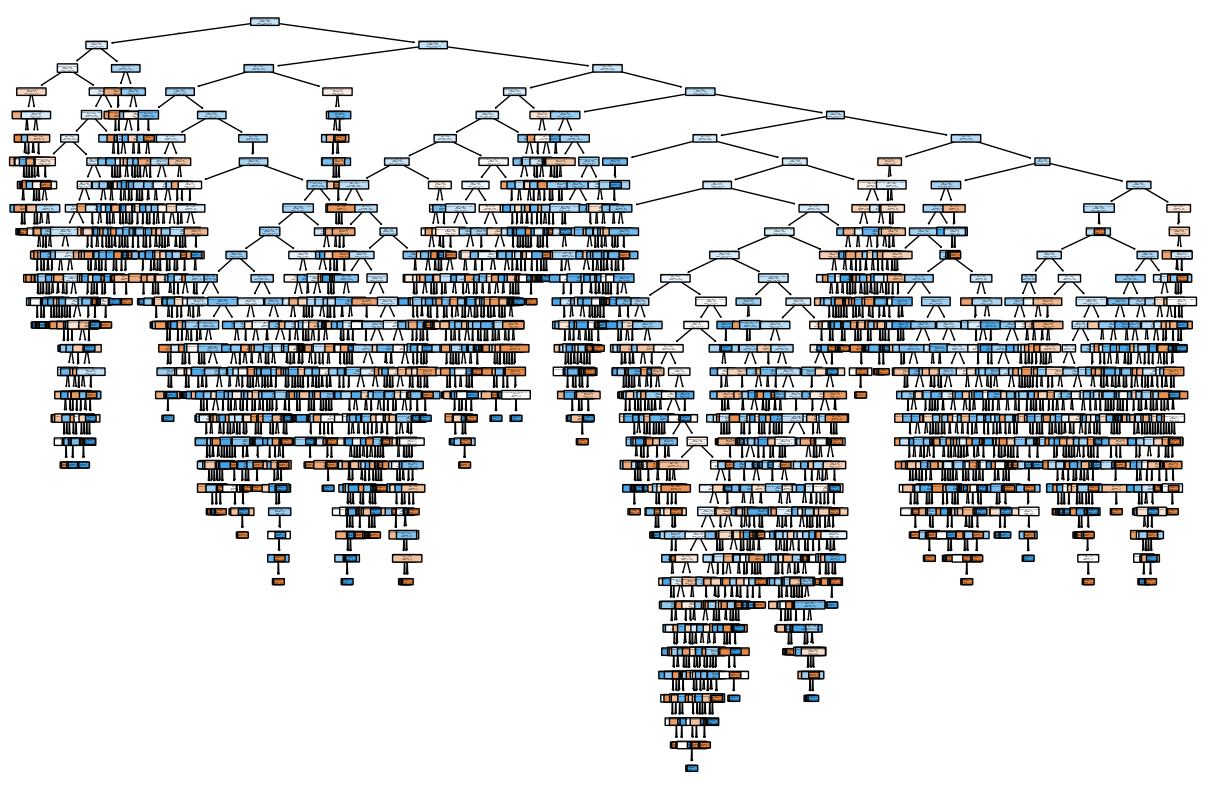

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.show()
